# Experience Analytics

## Load Data

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from joblib import dump,load
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

# to know which filepath to use to get to the source data
import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\cleaned_data.csv
../data\Field Descriptions.xlsx
../data\first500valuesTellCo.xlsx
../data\TellCo_financial_data.xlsx


In [2]:
df = pd.read_csv('../data\cleaned_data.csv')
df

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
0,0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,1.570185e+06,1.835594e+07,1.785519e+07,2.905912e+06,3.701304e+06,2.924265e+08,1.805588e+08,67.0,47.0,NaN
1,1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,1.933278e+06,3.935912e+07,3.556554e+07,4.414096e+06,9.373850e+05,6.099208e+08,5.419594e+08,42.0,70.0,NaN
2,2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,1.726277e+06,3.442524e+07,2.375120e+07,1.022912e+07,3.363124e+06,2.299803e+08,4.149084e+08,15.0,NaN,NaN
3,3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,6.574930e+05,3.653476e+07,1.509259e+07,1.181176e+07,2.070983e+06,8.103879e+08,7.618372e+08,88.0,NaN,NaN
4,4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,9.127880e+05,3.422225e+07,1.753980e+07,7.748843e+06,2.110349e+06,5.312370e+08,5.646198e+08,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,...,3.517065e+06,2.795510e+07,3.756186e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,117.0,32.0,NaN
149997,149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,...,2.352181e+06,2.216552e+07,4.064329e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,77.0,29.0,NaN
149998,149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,...,1.260239e+06,2.451641e+07,1.502970e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,90.0,49.0,NaN
149999,149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,...,8.231090e+05,1.712251e+07,1.649484e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,71.0,42.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      150001 non-null  int64  
 1   Bearer Id                       150001 non-null  object 
 2   Start                           150000 non-null  object 
 3   Start ms                        150000 non-null  float64
 4   End                             150000 non-null  object 
 5   End ms                          150000 non-null  float64
 6   Dur. (ms)                       150000 non-null  float64
 7   IMSI                            149431 non-null  float64
 8   MSISDN/Number                   148935 non-null  float64
 9   IMEI                            149429 non-null  float64
 10  Last Location Name              148848 non-null  object 
 11  Avg RTT DL (ms)                 122172 non-null  float64
 12  Avg RTT UL (ms) 

In [11]:
# creating a new dataframe with the experience metrics

experience_metrics = df[['MSISDN/Number', 'TCP Total', 'RTT Total', 'Throughput Total', 'Handset Type', 'Handset Manufacturer']]
experience_metrics

,MSISDN/Number,TCP Total,RTT Total,Throughput Total,Handset Type,Handset Manufacturer
0,3.366496e+10,NaN,47.0,67.0,Samsung Galaxy A5 Sm-A520F,Samsung
1,3.368185e+10,NaN,70.0,42.0,Samsung Galaxy J5 (Sm-J530),Samsung
2,3.376063e+10,NaN,NaN,15.0,Samsung Galaxy A8 (2018),Samsung
3,3.375034e+10,NaN,NaN,88.0,undefined,undefined
4,3.369980e+10,NaN,NaN,15.0,Samsung Sm-G390F,Samsung
...,...,...,...,...,...,...
149996,3.365069e+10,NaN,32.0,117.0,Apple iPhone 8 Plus (A1897),Apple
149997,3.366345e+10,NaN,29.0,77.0,Apple iPhone Se (A1723),Apple
149998,3.362189e+10,NaN,49.0,90.0,Apple iPhone Xs (A2097),Apple
149999,3.361962e+10,NaN,42.0,71.0,Huawei Fig-Lx1,Huawei


### checking if outliers exist - using IQR score



In [13]:
# checking outliers for in TCP Total

Q1 = np.percentile(df['TCP Total'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['TCP Total'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['TCP Total'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(df['TCP Total'], interpolation = 'midpoint') 
o = (df['TCP Total'] < (Q1 - 1.5 * IQR)) | (df['TCP Total'] > (Q3 + 1.5 * IQR))
m = o.unique()
print('TCP Total', m)

TCP Total [False]


In [15]:
# checking outliers for in RTT Total

Q1 = np.percentile(df['RTT Total'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['RTT Total'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['RTT Total'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(df['RTT Total'], interpolation = 'midpoint') 
o = (df['RTT Total'] < (Q1 - 1.5 * IQR)) | (df['RTT Total'] > (Q3 + 1.5 * IQR))
n = o.unique()
print('RTT Total', n)

RTT Total [False]


In [17]:
# checking outliers for in Throughput Total

Q1 = np.percentile(df['Throughput Total'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(df['Throughput Total'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['Throughput Total'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(df['Throughput Total'], interpolation = 'midpoint') 
o = (df['Throughput Total'] < (Q1 - 1.5 * IQR)) | (df['Throughput Total'] > (Q3 + 1.5 * IQR))
p = np.unique(o, return_counts=True)
print('Throughput Total', p)

Throughput Total (array([False]), array([150001], dtype=int64))


In [24]:
# aggregating, per customer, the experience metrics

agg_xp_metrics = experience_metrics.groupby('MSISDN/Number').agg({'TCP Total': 'sum',
                                                                  'RTT Total': 'sum',
                                                                  'Handset Type': [lambda x: x.mode()[0]],
                                                                  'Throughput Total': 'sum'})
agg_xp_metrics.head()

,TCP Total,RTT Total,Handset Type,Throughput Total
,sum,sum,<lambda>,sum
MSISDN/Number,,,,
3.360100e+10,0.0,46.0,Huawei P20 Lite Huawei Nova 3E,76.0
3.360100e+10,0.0,31.0,Apple iPhone 7 (A1778),99.0
3.360100e+10,0.0,0.0,undefined,97.0
3.360101e+10,0.0,84.0,Apple iPhone 5S (A1457),248.0
3.360101e+10,9370832.0,119.0,Apple iPhone Se (A1723),56844.0


In [ ]:
# !!haven't removed missing values. rows at least

In [27]:
# renaming df

newagg_xp_metrics = pd.DataFrame(columns=["TCP Total", "RTT Total", "Handset Type", "Throughput Total"])

newagg_xp_metrics["TCP Total"] = agg_xp_metrics["TCP Total"]["sum"]
newagg_xp_metrics["RTT Total"] = agg_xp_metrics["RTT Total"]["sum"]
newagg_xp_metrics["Handset Type"] = agg_xp_metrics["Handset Type"]["<lambda>"]
newagg_xp_metrics["Throughput Total"] = agg_xp_metrics["Throughput Total"]["sum"]
newagg_xp_metrics.head()

,TCP Total,RTT Total,Handset Type,Throughput Total
MSISDN/Number,,,,
3.360100e+10,0.0,46.0,Huawei P20 Lite Huawei Nova 3E,76.0
3.360100e+10,0.0,31.0,Apple iPhone 7 (A1778),99.0
3.360100e+10,0.0,0.0,undefined,97.0
3.360101e+10,0.0,84.0,Apple iPhone 5S (A1457),248.0
3.360101e+10,9370832.0,119.0,Apple iPhone Se (A1723),56844.0


## The top 10, bottom 10 and the most frequent experience metrics

In [49]:
# top 10 tcp values in the dataset

tcp_data = df.sort_values('TCP Total', ascending=False)
tcp_top_10 = tcp_data.head(10)['TCP Total']
tcp_bottom_10 = tcp_data.tail(10)['TCP Total']
tcp_most_10 = df['TCP Total'].value_counts().head(10)

In [50]:
tcp_top_10, tcp_bottom_10, tcp_most_10

(34636     4.344116e+09
 140797    4.301477e+09
 77950     4.294432e+09
 135677    4.291465e+09
 3741      4.288121e+09
 119667    4.275492e+09
 39608     4.268647e+09
 59011     4.261616e+09
 76971     4.260174e+09
 41182     4.254660e+09
 Name: TCP Total, dtype: float64,
 149988   NaN
 149991   NaN
 149992   NaN
 149993   NaN
 149994   NaN
 149996   NaN
 149997   NaN
 149998   NaN
 149999   NaN
 150000   NaN
 Name: TCP Total, dtype: float64,
 2660.0     29
 5320.0     24
 6650.0     20
 3990.0     19
 7980.0     14
 1873.0     13
 15960.0     9
 2648.0      9
 10640.0     8
 2752.0      8
 Name: TCP Total, dtype: int64)

In [51]:
# top 10 rtt values in the dataset

rtt_data = df.sort_values('RTT Total', ascending=False)
rtt_top_10 = rtt_data.head(10)['RTT Total']
rtt_bottom_10 = rtt_data.tail(10)['RTT Total']
rtt_most_10 = df['RTT Total'].value_counts().head(10)

In [52]:
rtt_top_10, rtt_bottom_10, rtt_most_10

(30155     96924.0
 29916     64641.0
 17894     55812.0
 5963      54848.0
 22839     27278.0
 23442     26300.0
 1361      25922.0
 81256     25715.0
 97312     25388.0
 100575    24738.0
 Name: RTT Total, dtype: float64,
 149959   NaN
 149960   NaN
 149962   NaN
 149965   NaN
 149976   NaN
 149981   NaN
 149985   NaN
 149987   NaN
 149994   NaN
 150000   NaN
 Name: RTT Total, dtype: float64,
 29.0    4993
 39.0    4222
 38.0    2761
 40.0    2647
 30.0    2592
 28.0    2424
 49.0    2219
 41.0    1978
 31.0    1960
 48.0    1855
 Name: RTT Total, dtype: int64)

In [53]:
# top 10 throughput values in the dataset

tp_data = df.sort_values('Throughput Total', ascending=False)
tp_top_10 = tp_data.head(10)['Throughput Total']
tp_bottom_10 = tp_data.tail(10)['Throughput Total']
tp_most_10 = df['Throughput Total'].value_counts().head(10)

In [54]:
rtt_top_10, rtt_bottom_10, rtt_most_10

(30155     96924.0
 29916     64641.0
 17894     55812.0
 5963      54848.0
 22839     27278.0
 23442     26300.0
 1361      25922.0
 81256     25715.0
 97312     25388.0
 100575    24738.0
 Name: RTT Total, dtype: float64,
 149959   NaN
 149960   NaN
 149962   NaN
 149965   NaN
 149976   NaN
 149981   NaN
 149985   NaN
 149987   NaN
 149994   NaN
 150000   NaN
 Name: RTT Total, dtype: float64,
 29.0    4993
 39.0    4222
 38.0    2761
 40.0    2647
 30.0    2592
 28.0    2424
 49.0    2219
 41.0    1978
 31.0    1960
 48.0    1855
 Name: RTT Total, dtype: int64)

Compute & report:
- The distribution of the average throughput  per handset type and provide interpretation for your findings.
- The average TCP retransmission view per handset type and provide interpretation for your findings.


In [57]:
# getting the aggregate handset data

handset_data = df[['Handset Type', 'Throughput Total', 'TCP Total']]
agg_handset_data = handset_data.groupby('Handset Type').mean()
agg_handset_data.columns = ['avg_tp_per_set', 'avg_tcp_per_set']
agg_handset_data.head()


,avg_tp_per_set,avg_tcp_per_set
Handset Type,,
A-Link Telecom I. Cubot A5,23510.0,NaN
A-Link Telecom I. Cubot Note Plus,6699.0,616213.0
A-Link Telecom I. Cubot Note S,8937.0,41411731.0
A-Link Telecom I. Cubot Nova,56217.0,137170.0
A-Link Telecom I. Cubot Power,69468.0,8041.0


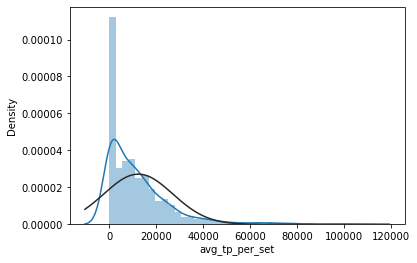

In [62]:
# average throughput/handset distribution

sns.distplot(agg_handset_data['avg_tp_per_set'] , fit=norm);

 The distribution of the throughput per handset is right tailed

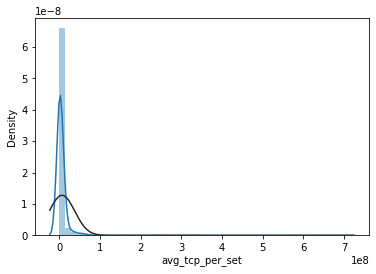

In [63]:
# average tcp/handset distribution
sns.distplot(agg_handset_data['avg_tcp_per_set'] , fit=norm);

 The distribution of the tcp per handset is right tailed. More so than for the throughput per handset

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      150001 non-null  int64  
 1   Bearer Id                       150001 non-null  object 
 2   Start                           150000 non-null  object 
 3   Start ms                        150000 non-null  float64
 4   End                             150000 non-null  object 
 5   End ms                          150000 non-null  float64
 6   Dur. (ms)                       150000 non-null  float64
 7   IMSI                            149431 non-null  float64
 8   MSISDN/Number                   148935 non-null  float64
 9   IMEI                            149429 non-null  float64
 10  Last Location Name              148848 non-null  object 
 11  Avg RTT DL (ms)                 122172 non-null  float64
 12  Avg RTT UL (ms) 

#### before making the clusters, we have to label encode the columns with categorical data 

In [71]:
# getting the columns with categorical data (and numerical and datetime data)

categorical = []
numerical = []
datetime = []

for col in df.columns:
    if df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical.append(col)
    elif df[col].dtype == object:
        categorical.append(col)
    else:
        datetime.append(col)

In [72]:
# categorised dataframe

cat_df = df[categorical+numerical+datetime]
cat_df.head()

,Bearer Id,Start,End,Last Location Name,Handset Manufacturer,Handset Type,Unnamed: 0,Start ms,End ms,Dur. (ms),...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
0,13114483460844900352,2019-04-04 12:01:18,2019-04-25 14:35:31,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,0,770.0,662.0,1823652.0,...,1570185.0,18355943.0,17855187.0,2905912.0,3701304.0,292426453.0,180558843.0,67.0,47.0,NaN
1,13114483482878900224,2019-04-09 13:04:04,2019-04-25 08:15:48,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1,235.0,606.0,1365104.0,...,1933278.0,39359124.0,35565545.0,4414096.0,937385.0,609920783.0,541959383.0,42.0,70.0,NaN
2,13114483484080500736,2019-04-09 17:42:11,2019-04-25 11:58:13,D42335A,Samsung,Samsung Galaxy A8 (2018),2,1.0,652.0,1361762.0,...,1726277.0,34425237.0,23751202.0,10229119.0,3363124.0,229980251.0,414908351.0,15.0,NaN,NaN
3,13114483485442799616,2019-04-10 00:31:25,2019-04-25 07:36:35,T21824A,undefined,undefined,3,486.0,171.0,1321509.0,...,657493.0,36534765.0,15092588.0,11811761.0,2070983.0,810387875.0,761837216.0,88.0,NaN,NaN
4,13114483499480700928,2019-04-12 20:10:23,2019-04-25 10:40:32,D88865A,Samsung,Samsung Sm-G390F,4,565.0,954.0,1089009.0,...,912788.0,34222253.0,17539799.0,7748843.0,2110349.0,531237049.0,564619822.0,15.0,NaN,NaN


In [74]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  object 
 1   Start                           150000 non-null  object 
 2   End                             150000 non-null  object 
 3   Last Location Name              148848 non-null  object 
 4   Handset Manufacturer            149429 non-null  object 
 5   Handset Type                    149429 non-null  object 
 6   Start ms                        150000 non-null  float64
 7   End ms                          150000 non-null  float64
 8   Dur. (ms)                       150000 non-null  float64
 9   IMSI                            149431 non-null  float64
 10  MSISDN/Number                   148935 non-null  float64
 11  IMEI                            149429 non-null  float64
 12  Avg RTT DL (ms) 

In [73]:
# drop the unnamed column since it's just the index repeated

cat_df.drop('Unnamed: 0', axis=1, inplace=True)
cat_df.head()

,Bearer Id,Start,End,Last Location Name,Handset Manufacturer,Handset Type,Start ms,End ms,Dur. (ms),IMSI,...,Social Media Total Data Volume,Youtube Total Data Volume,Netflix Total Data Volume,Google Total Data Volume,Email Total Data Volume,Gaming Total Data Volume,Other Total Data Volume,Throughput Total,RTT Total,TCP Total
0,13114483460844900352,2019-04-04 12:01:18,2019-04-25 14:35:31,9164566995485190,Samsung,Samsung Galaxy A5 Sm-A520F,770.0,662.0,1823652.0,2.082014e+14,...,1570185.0,18355943.0,17855187.0,2905912.0,3701304.0,292426453.0,180558843.0,67.0,47.0,NaN
1,13114483482878900224,2019-04-09 13:04:04,2019-04-25 08:15:48,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),235.0,606.0,1365104.0,2.082019e+14,...,1933278.0,39359124.0,35565545.0,4414096.0,937385.0,609920783.0,541959383.0,42.0,70.0,NaN
2,13114483484080500736,2019-04-09 17:42:11,2019-04-25 11:58:13,D42335A,Samsung,Samsung Galaxy A8 (2018),1.0,652.0,1361762.0,2.082003e+14,...,1726277.0,34425237.0,23751202.0,10229119.0,3363124.0,229980251.0,414908351.0,15.0,NaN,NaN
3,13114483485442799616,2019-04-10 00:31:25,2019-04-25 07:36:35,T21824A,undefined,undefined,486.0,171.0,1321509.0,2.082014e+14,...,657493.0,36534765.0,15092588.0,11811761.0,2070983.0,810387875.0,761837216.0,88.0,NaN,NaN
4,13114483499480700928,2019-04-12 20:10:23,2019-04-25 10:40:32,D88865A,Samsung,Samsung Sm-G390F,565.0,954.0,1089009.0,2.082014e+14,...,912788.0,34222253.0,17539799.0,7748843.0,2110349.0,531237049.0,564619822.0,15.0,NaN,NaN


In [ ]:
cat_df[categorical].head(3)

columns = [50, 52, 51, 49]
for col in columns:
    x = data.iloc[:, col].values
    x = x.reshape(-1,1)
    encoder = LabelEncoder()
    encoder = encoder.fit(x)
    x = encoder.transform(x)
    name = data.columns[col]
    data[name + '_encoded'] = x   # create new columns with the encoded values instead of replacing them, might come in handy at later stages

In [65]:
# making the cluster

cluster_data = newagg_xp_metrics[['Handset Type', 'Throughput Total', 'RTT Total', 'TCP Total']]
norm_cluster_data = np.log1p(cluster_data)   #log transformation
norm_cluster_data.head()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log1p method